In [240]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Project
## Social Media Engagement EDA Analysis 

In [241]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\social_media_engagement1.csv")

# Data Info

In [242]:
df.shape

(100, 9)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [244]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


# Data Handling & Cleaning

In [245]:
df["post_time"]=pd.to_datetime(df["post_time"])

In [246]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [247]:
df.drop(columns=["post_id"],inplace=True)

# EDA & Visualization

## Post type and likes classification by platform 

Text(0.5, 1.0, 'Post type and likes classification by platform')

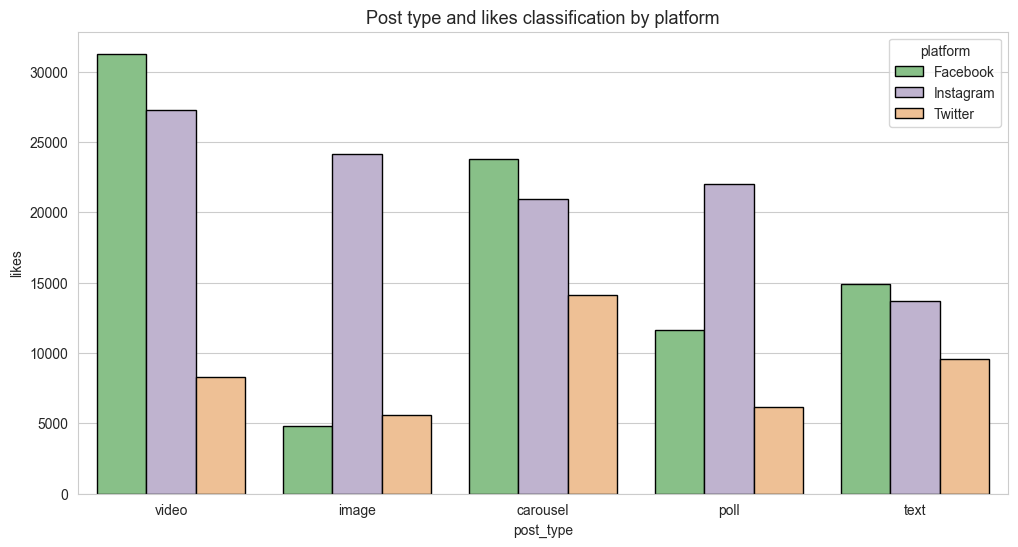

In [248]:
classifi_pl=df.groupby(["platform","post_type"])["likes"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_pl,x="post_type",y="likes",hue="platform",palette="Accent",edgecolor="black",ci=None)
plt.title("Post type and likes classification by platform",size=13)

# Time series analysis  

In [249]:
# Adding extra column to understand better engagement ( including=total likes,comments and shares)
df["total_engagement"]=df["likes"]+df["comments"]+df["shares"]
df.head()
df["post_date"]=df["post_time"].dt.date
df["post_time"]=df["post_time"].dt.time
df.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,total_engagement,post_date
0,Facebook,image,14:45:00,2121,474,628,Thursday,positive,3223,2023-08-17
1,Facebook,carousel,00:45:00,3660,432,694,Sunday,neutral,4786,2023-05-14
2,Instagram,poll,16:15:00,4955,408,688,Tuesday,negative,6051,2023-02-21
3,Twitter,image,00:45:00,1183,90,187,Thursday,negative,1460,2023-11-16
4,Twitter,video,00:30:00,3499,247,286,Tuesday,positive,4032,2023-05-23


In [250]:
classifi_da=df.groupby("post_date")["total_engagement"].sum().reset_index()
classifi_da
fig=px.line(classifi_da,x="post_date",y="total_engagement",title="Total Social Media Engagement By Date")
fig.show()

In [257]:
classifi_ti=df.groupby("post_time")["total_engagement"].sum().reset_index()
classifi_ti
fig=px.line(classifi_ti,x="post_time",y="total_engagement",title="Total Social Media Engagement By Time")
fig.show()

In [258]:
classifi_dt=df.groupby("post_day")["total_engagement"].sum().reset_index()
classifi_dt
fig=px.line(classifi_dt,x="post_day",y="total_engagement",title="Total Social Media Engagement By Time")
fig.show()

In [263]:
classifi_se=df.groupby(["platform","post_type","sentiment_score"])["total_engagement"].sum().sort_values(ascending=False).reset_index()
classifi_se.style.background_gradient(cmap="Reds")


,platform,post_type,sentiment_score,total_engagement
0,Instagram,carousel,positive,18423
1,Instagram,video,negative,18071
2,Facebook,video,neutral,17720
3,Facebook,carousel,negative,17177
4,Instagram,poll,positive,16353
5,Facebook,video,positive,13864
6,Twitter,carousel,positive,13705
7,Instagram,image,positive,12590
8,Facebook,poll,negative,11985
9,Instagram,image,negative,11665


In [264]:
import plotly.express as px

fig = px.sunburst(df,
                  path=['platform', 'post_type', 'sentiment_score'],
                  values='total_engagement',
                  title='Engagement Breakdown by Platform, Post Type, and Sentiment',
                  color='platform')
fig.show()


## Alternative Visualization For Better Understanding

In [266]:
fig = px.bar(df,
             x='platform',
             y='total_engagement',
             color='post_type',
             barmode='group',
             title='Total Engagement by Platform and Post Type',
             hover_data=['sentiment_score'])
fig.show()
